In [1]:
!pip install tensorflow==1.15.0
#!pip install keras==2.1.5
from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 412.3MB 37kB/s 
     |████████████████████████████████| 3.8MB 40.1MB/s 
     |████████████████████████████████| 512kB 16.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=f89a899e84183d682532355aa8710f5b187b618e5ceaffbb974c22a2a0d6ce0f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc

In [2]:
#%cd 'drive/My Drive/CPS and IOT/Project'
#%cd 'drive/My Drive'

import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Project")
!ls
!cd "/content/drive/My Drive/Colab Notebooks/Project"

 data   motion_data.ipynb  'UCI HAR Dataset'


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
v1_data = pd.read_csv('data/single/test/G5NZCJ017507206-config.json-ashik-right-v1-single-2020-03-27-12-07-58.csv', skiprows=1, 
                      header=None, names=['unix_timestamp', 'sensor_id', 'accuracy', 'x_axis_val', 'y_axis_val', 'z_axis_val'])

v1_acc_data = v1_data[v1_data["sensor_id"] == 10]
v1_gyro_data = v1_data[v1_data["sensor_id"] == 4]
# print(v1_acc_data.count(), v1_gyro_data.count())

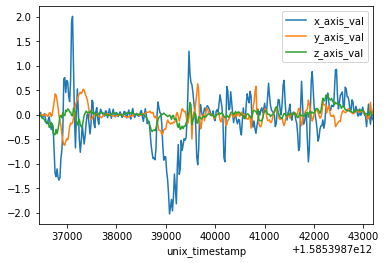

In [0]:
v1_gyro_data.plot(x='unix_timestamp', y=['x_axis_val', 'y_axis_val', 'z_axis_val'])

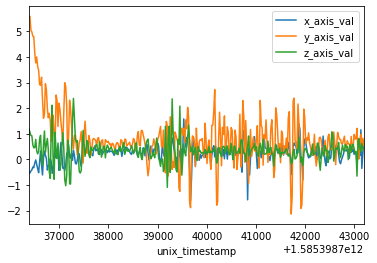

In [0]:
v1_acc_data.plot(x='unix_timestamp', y=['x_axis_val', 'y_axis_val', 'z_axis_val'])

In [0]:
v11_data = pd.read_csv('data/single/train/G5NZCJ017507206-config.json-ashik-right-v11-single-2020-03-27-12-28-35.csv', skiprows=1, 
                      header=None, names=['unix_timestamp', 'sensor_id', 'accuracy', 'x_axis_val', 'y_axis_val', 'z_axis_val'])

v11_acc_data = v11_data[v1_data["sensor_id"] == 10]
v11_gyro_data = v11_data[v1_data["sensor_id"] == 4]
# print(v1_acc_data.count(), v1_gyro_data.count())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


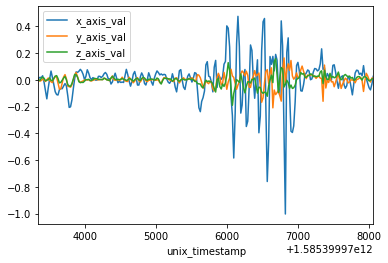

In [0]:
v11_gyro_data.plot(x='unix_timestamp', y=['x_axis_val', 'y_axis_val', 'z_axis_val'])

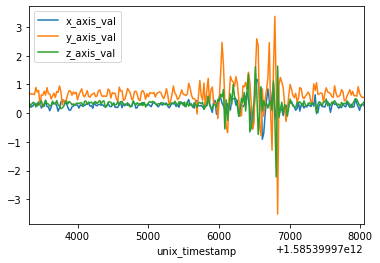

In [0]:
v11_acc_data.plot(x='unix_timestamp', y=['x_axis_val', 'y_axis_val', 'z_axis_val'])

In [0]:
#print(type(v1_acc_data))
#print(type(v1_gyro_data))

#import tensorflow as tf

from pandas import read_csv
def load_file(filepath):
	#dataframe = read_csv(filepath, skiprows = 1, header=None, names=['unix_timestamp', 'sensor_id', 'accuracy', 'x_axis_val', 'y_axis_val', 'z_axis_val'])
  dataframe = read_csv(filepath, skiprows = 1, header=None, names=['x_axis_val', 'y_axis_val', 'z_axis_val'])
  return dataframe.values


#print(tf.__version__)

import glob

def load_file_seperate(filepath):
	#dataframe = read_csv(filepath, skiprows = 1, header=None, names=['unix_timestamp', 'sensor_id', 'accuracy', 'x_axis_val', 'y_axis_val', 'z_axis_val'])
  dataframe = read_csv(filepath, skiprows = 1, header=None, names=['sensor_id','accuracy','x_axis_val', 'y_axis_val', 'z_axis_val'])
  dataframe_acc =  (dataframe[dataframe["sensor_id"] == 10]).values
  dataframe_acc = np.delete(dataframe_acc, [0,1], axis=1)
  dataframe_gyro =  (dataframe[dataframe["sensor_id"] == 4]).values
  dataframe_gyro = np.delete(dataframe_gyro, [0,1], axis=1)
  return dataframe_acc,dataframe_gyro

# test_filepath = "data/single/train/G5NZCJ017507206-config.json-ashik-right-v11-single-2020-03-27-12-28-35.csv"

# hello_acc, hello_gyro = load_file_seperate(test_filepath)
# # hello_acc = hello[np.where(hello[:,0] == 10)]
# # hello_gyro = hello[np.where(hello[:,0] == 4)]
# # print(hello.shape)
# # print(hello)
# print(hello_acc.shape)
# print(hello_gyro.shape)
# print(hello_acc[1])
# print("boka")
# print(hello_gyro[1])


def get_max_size():
  mylist = [f for f in glob.glob("data/single/test/*.csv")]
  mylist += [f for f in glob.glob("data/single/train/*.csv")]
  mx_acc = 0
  mx_gyro = 0
  mn_acc = 800
  mn_gyro = 800
  for s in mylist:
    print(s)
    #cur_data = load_file(s)
    cur_data_acc, cur_data_gyro = load_file_seperate(s)
    ro_acc = cur_data_acc.shape[0]
    ro_gyro = cur_data_gyro.shape[0]
    #print(ro)
    mx_acc = max(mx_acc,ro_acc)
    mx_gyro = max(mx_gyro,ro_gyro)
    #mn = min(mn,ro)
  return mx_acc, mx_gyro

# mxa,mxg = get_max_size()
# print("mxaccsize: "+str(mxa)+" mxgyrsize: "+str(mxg))

In [0]:
from numpy import dstack
from numpy import vstack
from sklearn.preprocessing import MinMaxScaler

# data = load_file('data/single/G5NZCJ017507206-config.json-ashik-right-v11-single-2020-03-27-12-28-35.csv') 
# print(type(data))
# print(data.shape)



# def load_group(filenames, prefix=''):
# 	loaded = list()
# 	for name in filenames:
# 		data = load_file(prefix + name)
# 		loaded.append(data)
# 	# stack group so that features are the 3rd dimension
# 	loaded = dstack(loaded)
# 	return loaded

def load_file_padded(mx_acc_size, mx_gyro_size, filepath):
  data_acc, data_gyro = load_file_seperate(filepath)
  extra_acc = mx_acc_size - data_acc.shape[0]
  extra_gyro = mx_gyro_size - data_gyro.shape[0]
  for i in range(extra_acc):
    data_acc = np.append(data_acc,[[0.0,0.0,0.0]],axis=0)
  for i in range(extra_gyro):
    data_gyro = np.append(data_gyro,[[0.0,0.0,0.0]],axis=0)
  return data_acc, data_gyro

# mylist = [f for f in glob.glob("data/single/train/*.csv")]

# data_acc, data_gyro = load_file_padded(mxa,mxg,mylist[7]) 
# print(type(data_acc))
# print(data_acc.shape)
# print(type(data_gyro))
# print(data_gyro.shape)

#print(data)

def get_label(filename): #same as before
  pos1 = filename.find("-v")
  pos2 = filename.find("-single")
  #print(str(pos1)+" "+str(pos2))
  val = int(filename[pos1+2:pos2])
  return val

def load_group(filenames, prefix=''): #train or test group.. for train filenames will be from train...
  loaded_acc = list()
  loaded_gyro = list()
  loaded_label = list()
  #mxa,mxg = get_max_size()
  mxa = 347
  mxg = 346
  #for generalizing change status above 3 lines
  scaler_acc = MinMaxScaler(feature_range=(-1,1))
  scaler_gyro = MinMaxScaler(feature_range=(-1,1))
  for name in filenames:
    #if ("-v1-" in name) or ("-v2-"in name) or ("-v3-"in name):
      #print(name)
      data_acc, data_gyro = load_file_padded(mxa,mxg,prefix + name)
      scaler_acc.fit(data_acc)
      scaler_gyro.fit(data_gyro)
      data_acc_normalized = scaler_acc.transform(data_acc)
      data_gyro_normalized = scaler_gyro.transform(data_gyro)
      #print(name)
      label = get_label(name)
      #if label==1 or label==11:
      #print(label)
      #if label==11:
      #  label = 2
      loaded_acc.append(data_acc_normalized)
      loaded_gyro.append(data_gyro_normalized)
      loaded_label.append(label)
  X_acc = np.stack(loaded_acc,axis=0)
  X_gyro = np.stack(loaded_gyro,axis=0)
  y = np.stack(loaded_label,axis=0)
  y = np.reshape(y,(-1,1))
  return X_acc,X_gyro,y





In [0]:
from keras.utils import to_categorical

def load_dataset():
  trainlist = [f for f in glob.glob("data/single/train/*.csv")]
  testlist = [f for f in glob.glob("data/single/test/*.csv")]

  trainX_acc, trainX_gyro, trainy = load_group(trainlist)
  testX_acc, testX_gyro, testy = load_group(testlist)

  trainy = trainy - 1
  testy = testy - 1
  #print(testy)
  trainy = to_categorical(trainy)
  testy = to_categorical(testy)
  #print(testy)
  #print(trainy.shape,testy.shape)
  return trainX_acc, trainX_gyro, trainy, testX_acc, testX_gyro, testy
  
trainX_acc, trainX_gyro, trainy, testX_acc, testX_gyro, testy = load_dataset() #ready to go into rnn

# print(trainX_acc.shape)
# print(trainX_gyro.shape)
# print(trainy.shape)
# print(testX_acc.shape)
# print(testX_gyro.shape)
# print(testy.shape)


In [24]:
print(trainX_acc.shape)
trainX_acc = np.expand_dims(trainX_acc,axis=2)
print(trainX_acc.shape)
cutX_acc = trainX_acc[0:3,:,:]
demo = np.random.rand(2,4,3)
print(demo)
print(demo.shape)
new_demo = np.expand_dims(demo,axis=2)
print(new_demo.shape)
print(new_demo)

(620, 347, 3)
(620, 347, 1, 3)
[[[0.3341845  0.42723978 0.26540102]
  [0.69032574 0.21070691 0.53080477]
  [0.07696912 0.58131903 0.78227089]
  [0.86540479 0.15099069 0.41307804]]

 [[0.06740018 0.76795544 0.7972393 ]
  [0.19029023 0.25042058 0.82673251]
  [0.43117471 0.45703084 0.82930545]
  [0.78906529 0.31747587 0.8765032 ]]]
(2, 4, 3)
(2, 4, 1, 3)
[[[[0.3341845  0.42723978 0.26540102]]

  [[0.69032574 0.21070691 0.53080477]]

  [[0.07696912 0.58131903 0.78227089]]

  [[0.86540479 0.15099069 0.41307804]]]


 [[[0.06740018 0.76795544 0.7972393 ]]

  [[0.19029023 0.25042058 0.82673251]]

  [[0.43117471 0.45703084 0.82930545]]

  [[0.78906529 0.31747587 0.8765032 ]]]]


In [37]:
import tensorflow as tf
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential, Model
from keras.layers import Dense,Conv2D,Reshape
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import concatenate
from keras.utils import to_categorical
from matplotlib import pyplot

print(tf.__version__)

1.15.0


In [41]:

def create_model(trainX_acc, trainX_gyro, trainy, testX_acc, testX_gyro, testy):
  n_timesteps_acc, n_features_acc, n_timesteps_gyro, n_features_gyro = trainX_acc.shape[1], trainX_acc.shape[3], trainX_gyro.shape[1], trainX_gyro.shape[3]    
  n_outputs = trainy.shape[1]

  input_acc = Input(shape=(n_timesteps_acc,1,n_features_acc))
  input_gyro = Input(shape=(n_timesteps_gyro,1,n_features_gyro))
  x = Conv2D(16, (10, 1), padding='same', activation='relu')(input_acc)
  x = Reshape((n_timesteps_acc,16))(x)
  #x = np.squeeze(x, axis=(2,))
  #x = LSTM(100,return_sequences=True, input_shape=(n_timesteps_acc,n_features_acc))(input_acc)
  x = LSTM(100,return_sequences=True)(x)
  x = LSTM(100)(x)

  y = Conv2D(16, (10, 1), padding='same', activation='relu')(input_gyro)
  y = Reshape((n_timesteps_gyro,16))(y)
  #y = np.squeeze(y, axis=(2,))
  #y = LSTM(100,return_sequences=True, input_shape=(n_timesteps_gyro,n_features_gyro))(input_gyro)
  y = LSTM(100,return_sequences=True)(y)
  y = LSTM(100)(y)

  combined = concatenate([x, y],axis=1) #axis = 0 or axis = 1?? x and y both have 25 dimension, do we want 25 dimension or 50 dimension?? axis = 1 gives 50 dimension
                                        # axis = 0 gives some kind of error :v

  z = Dense(100,activation='relu')(combined)
  z = Dense(100,activation='relu')(z)
  z = Dense(n_outputs,activation='softmax')(z)

  model = Model(inputs=[input_acc, input_gyro], outputs=z)
  #print(model.summary)
  return model
  
#mymodel = create_model(trainX_acc, trainX_gyro, trainy, testX_acc, testX_gyro, testy)
#print(mymodel.summary())


def evaluate_model(trainX_acc, trainX_gyro, trainy, testX_acc, testX_gyro, testy):
  verbose, epochs, batch_size = 1, 20, 10
  model = create_model(trainX_acc, trainX_gyro, trainy, testX_acc, testX_gyro, testy)
  print(model.summary())
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = model.fit([trainX_acc,trainX_gyro], trainy, validation_data=([testX_acc,testX_gyro], testy), epochs=epochs, batch_size=batch_size, verbose=verbose)
  return model
#   model.add(LSTM(25, return_sequences=True, input_shape=(n_timesteps,n_features)))
# 	#model.add(Dropout(0.5))
#   model.add(LSTM(25))
#   model.add(Dense(25, activation='relu'))
#   model.add(Dense(25, activation='relu'))
#   model.add(Dense(n_outputs, activation='softmax'))
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 	# fit network
#   model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
# 	# evaluate model
#   _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
#   return model, accuracy

# def summarize_results(scores):
# 	print(scores)
# 	m, s = mean(scores), std(scores)
# 	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

def run_training(repeats=1):
	# load data
  trainX_acc, trainX_gyro, trainy, testX_acc, testX_gyro, testy = load_dataset()
  conv_trainX_acc = np.expand_dims(trainX_acc,axis=2)
  conv_trainX_gyro = np.expand_dims(trainX_gyro,axis=2)
  conv_testX_acc = np.expand_dims(testX_acc,axis=2)
  conv_testX_gyro = np.expand_dims(testX_gyro,axis=2)

  #for r in range(repeats):
  #model = evaluate_model(trainX_acc, trainX_gyro, trainy, testX_acc, testX_gyro, testy)
  model = evaluate_model(conv_trainX_acc, conv_trainX_gyro, trainy, conv_testX_acc, conv_testX_gyro, testy)
  return model

model = run_training()



Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           (None, 347, 1, 3)    0                                            
__________________________________________________________________________________________________
input_30 (InputLayer)           (None, 346, 1, 3)    0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 347, 1, 16)   496         input_29[0][0]                   
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 346, 1, 16)   496         input_30[0][0]                   
____________________________________________________________________________________________

In [0]:
model.save('model_handwriting_4_1_2020_11_39_PM.h5')

In [0]:
#for i in range(testX.shape[0]):
  #xnew = testX[i]
  #ynew - model.predict
trainX_acc, trainX_gyro, trainy, testX_acc, testX_gyro, testy = load_dataset() #ready to go into rnn
ynew = model.predict([testX_acc,testX_gyro])
print(ynew[0])
print(testy[0])

print(ynew[7])
print(testy[7])

[0.09649805 0.22261646 0.02099762 0.1562487  0.01351242 0.08949343
 0.08367244 0.03272405 0.026713   0.01214894 0.24537489]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0060719  0.01146338 0.04330199 0.0363314  0.01774039 0.00114828
 0.10537403 0.04396576 0.10984753 0.5876752  0.03708002]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
